### Import libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from prediksi import calc, predict, Forecast, error
from decomposed import Decomposed

C:\Users\USER\Downloads\project_akhir_kel_6_sales_predicting\prediksi.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')
C:\Users\USER\Downloads\project_akhir_kel_6_sales_predicting\decomposed.py:6: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


### Load dataset

In [2]:
df = pd.read_excel("global_superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [3]:
furniture

,Order Date,State,Country,Category,Sub-Category,Product Name,Sales
2,2012-01-28,North Carolina,United States,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.6440
7,2012-10-15,Texas,United States,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.4300
8,2011-12-12,California,United States,Furniture,Tables,Bretford Rectangular Conference Table Tops,3610.8480
20,2014-08-18,Pennsylvania,United States,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.1740
21,2013-05-06,Nevada,United States,Furniture,Tables,Global Adaptabilities Conference Tables,1685.8800
22,2014-11-07,Washington,United States,Furniture,Tables,Hon 5100 Series Wood Tables,2036.8600
28,2011-12-20,Virginia,United States,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",2244.4800
30,2011-10-14,Massachusetts,United States,Furniture,Chairs,Office Star - Ergonomic Mid Back Chair with 2-...,1628.8200
31,2013-08-27,California,United States,Furniture,Chairs,Global Troy Executive Leather Low-Back Tilter,1603.1360
32,2011-12-01,Wisconsin,United States,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,2807.8400


### Data preprocessing

In [4]:
# Menjumlahkan nilai penjualan (sales) dan mengelompokkan (grouping) berdasarkan tanggal penjualan (order date)
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [5]:
furniture

,Order Date,Sales
0,2011-01-07,2573.8200
1,2011-01-08,76.7280
2,2011-01-11,51.9400
3,2011-01-12,9.9400
4,2011-01-14,879.9390
5,2011-01-15,61.9600
6,2011-01-17,127.1040
7,2011-01-20,181.4700
8,2011-01-21,1413.5100
9,2011-01-22,25.2480


### Indexing time series data

In [6]:
# Mengganti dataframe index dengan kolom 'Order Date' (DatetimeIndex)
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15', '2011-01-17', '2011-01-20',
               '2011-01-21', '2011-01-22',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=890, freq=None)

In [7]:
furniture

,Sales
Order Date,
2011-01-07,2573.8200
2011-01-08,76.7280
2011-01-11,51.9400
2011-01-12,9.9400
2011-01-14,879.9390
2011-01-15,61.9600
2011-01-17,127.1040
2011-01-20,181.4700
2011-01-21,1413.5100


### Resampling

In [8]:
# Mencari rata-rata (mean) nilai penjualan (sales) dan grouping (B, MS, Y, D, dll.) dengan resample
# Parameter resample bisa 'B' = business day, 'MS' = Month Start, 'Y' = Year, 'D' = 'Year', dll
y = furniture['Sales'].resample('M').mean()

In [9]:
y

Order Date
2011-01-31     495.988250
2011-02-28     355.054000
2011-03-31     857.291529
2011-04-30     567.488357
2011-05-31     432.049188
2011-06-30     695.059242
2011-07-31     601.169500
2011-08-31     457.521656
2011-09-30     992.353367
2011-10-31     769.015438
2011-11-30     980.221486
2011-12-31    1532.298325
2012-01-31     978.328467
2012-02-29     474.160857
2012-03-31     769.689437
2012-04-30     805.822962
2012-05-31     624.996700
2012-06-30     428.565500
2012-07-31     719.706316
2012-08-31     602.412012
2012-09-30    1382.790684
2012-10-31     632.980184
2012-11-30    1286.701354
2012-12-31    1049.355418
2013-01-31     508.182867
2013-02-28     356.868273
2013-03-31     623.654800
2013-04-30     705.557368
2013-05-31     683.235818
2013-06-30     751.678437
2013-07-31     776.430059
2013-08-31     756.627794
2013-09-30    1162.563517
2013-10-31     533.198526
2013-11-30    1346.375352
2013-12-31    1372.914259
2014-01-31     397.602133
2014-02-28     528.179800
2

### Visualisasi data

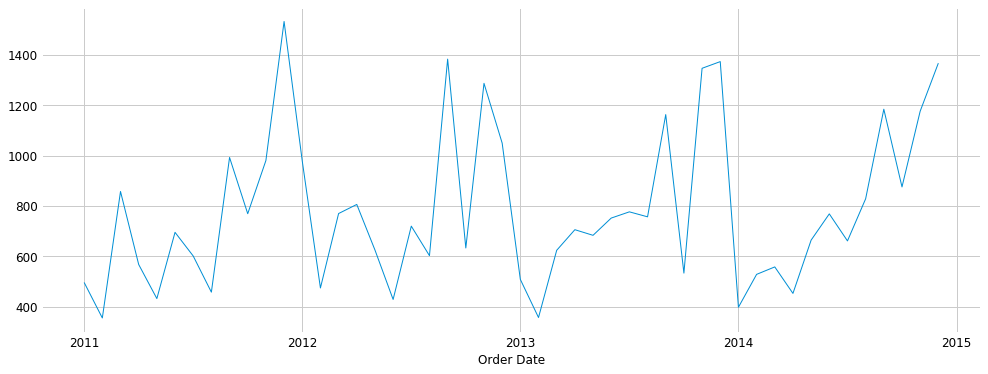

In [10]:
y.plot(figsize=(15, 6))
plt.show()

In [11]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style): 
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

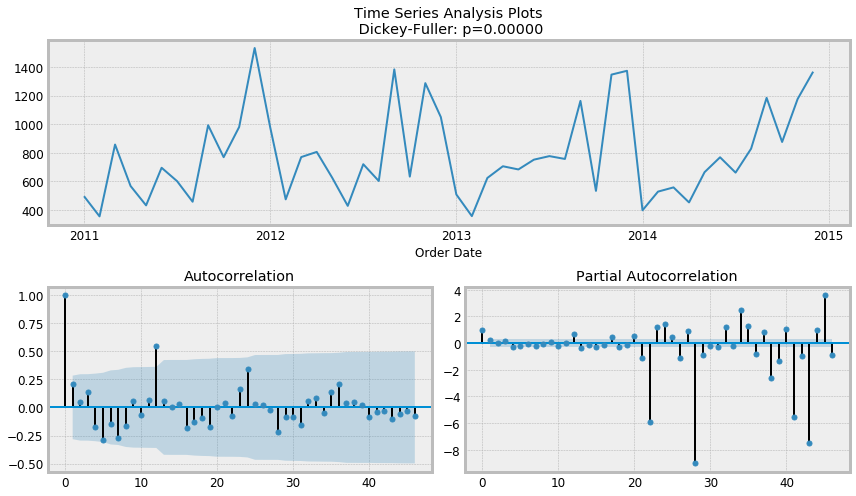

In [12]:
tsplot(y, lags=46)

### Melihat trend dan seasonality

<function matplotlib.pyplot.show(*args, **kw)>

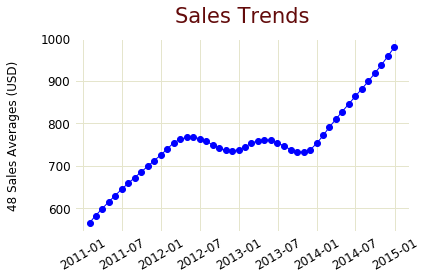

In [13]:
Decomposed.trend(y, 12,len(y))

<function matplotlib.pyplot.show(*args, **kw)>

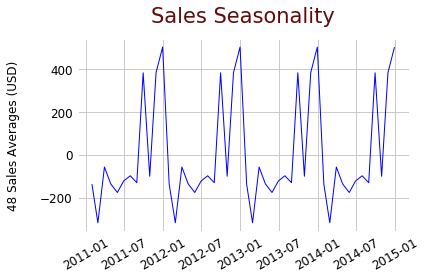

In [14]:
Decomposed.season(y, 12, len(y))

### Looping p, d, q, P, D, Q, s terbaik

In [15]:
summary, result = calc(y,12,10)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:768.9298200948517


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1569.1046171295686
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:476.07009292498407
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:495.46053304844736


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1593.1635089477127
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.48831350135737
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:721.7902291440997
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2737.9347902462287
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:465.19812745740336


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:497.72533867968554
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2661.727729429383
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:320.4270735846929
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:679.1552417641365
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1471.7076847708586
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.60388639272435
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.3341912177369


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1190.9550581085696
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:321.66678188638747
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:650.7455741993823
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2618.4072055031297
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:457.02372267149354
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:484.62712958724495
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2602.0034862943558
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:306.7595390029897
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:693.576609492117
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1724.0049162497241
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:478.0054442595991


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:479.5489826844681
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1058.8554787057278
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:303.9646056698195
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:666.7044660723109
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:466.9738782288749
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:480.10460957847715
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2915.418943077561
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:303.3350952599762
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:672.658348330064


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:882.7820120164474
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2005399418569
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:474.97590956962847


c:\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1476.1097724334354
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:301.6067455888064
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:650.2465934337637
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2620.2915917645414
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8778465282209
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:468.2051954896461
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3268.842362750007
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:296.0198016129297


In [16]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.010
Date:                            Mon, 03 Dec 2018   AIC                            296.020
Time:                                    21:57:51   BIC                            300.384
Sample:                                01-31-2011   HQIC                           297.048
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0486      0.285     -0.171      0.864      -0.607       0.510
ma.L1         -1.0000      0.364     -2.746      0.006      -1.714      -0.286
ar.S.L12      -0.0185      0.037     -0.506      0.613      -0.090       0.053
sigma2      2.721e+04   1.34e-05   2.03e+09      0.000    2.72e+04    2.72e+04
===================================================================================
Ljung-Box (Q):                       17.94   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.65   Prob(JB):                         0.58
Heteroskedasticity (H):               0.74   Skew:                             0.49
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.95e+24. Standard errors may be unstable.
"""

## Prediksi

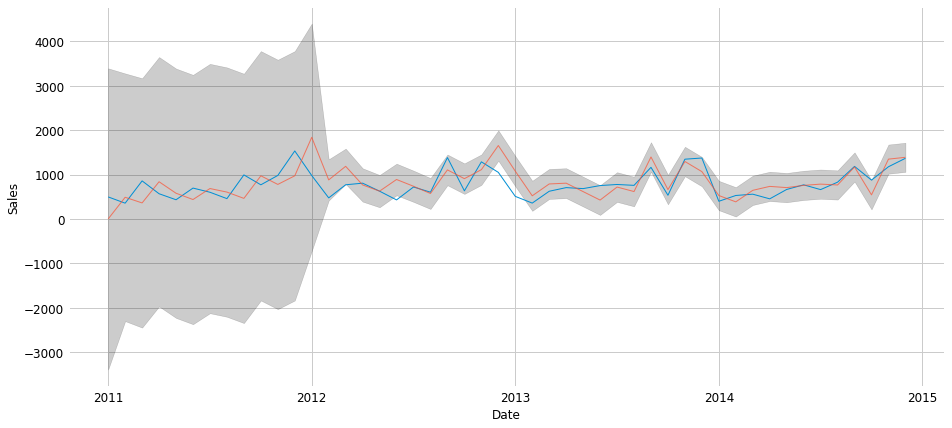

In [17]:
pred = predict(y, result)

In [18]:
mse, rmse, mape = error(y, pred)

In [19]:
print("MSE  : {} \nRMSE : {} \nMAPE : {}%".format(mse,rmse,mape))

MSE  : 87418.13 
RMSE : 295.67 
MAPE : 32.38%


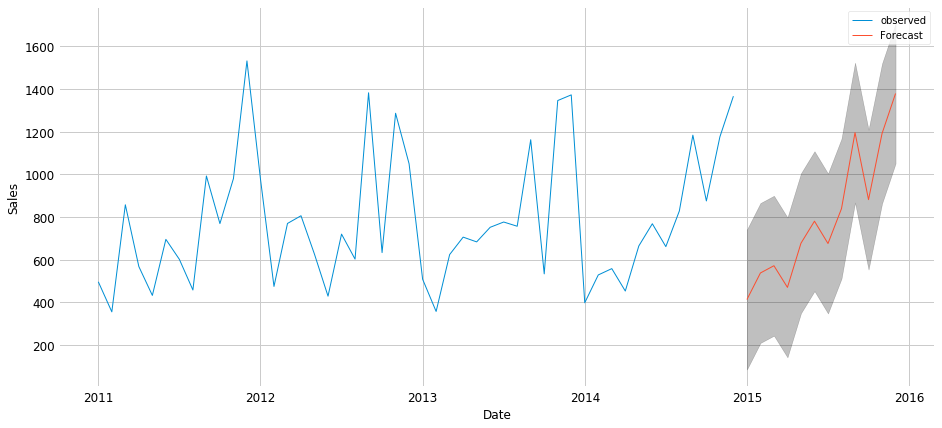

In [20]:
Forecast(y, result, 12)